In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns

# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

from datetime import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vince\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/api/charts/2016-general-election-trump-vs-clinton.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [3]:
# Load data
data = pd.read_csv(poll_data, parse_dates=True)

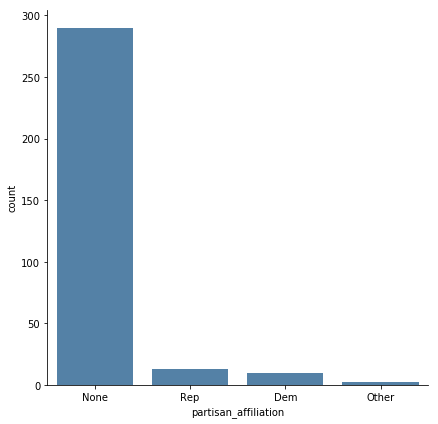

In [4]:
sns.factorplot('partisan_affiliation',kind='count',data=data,
               color='steelblue', size=6)

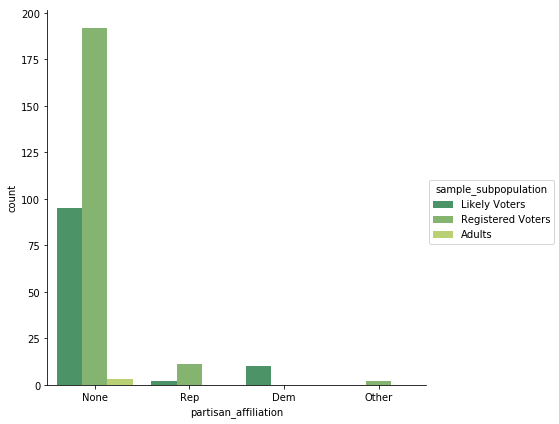

In [5]:
sns.factorplot('partisan_affiliation', kind='count', data=data,
               hue='sample_subpopulation', palette='summer', size=6)

In [9]:
# Let's examine what the best polling data we have predicts.
# We'll look at polls:
#     a) Without party affiliation
#     b) Of likely voters
#     c) Shortly before the election

unbiased = data[(data['partisan_affiliation'] == 'None') &\
                 (data['sample_subpopulation'] == 'Likely Voters') & \
                 (data['end_date'] >= '2016-11-01')].copy()

In [10]:
unbiased['clinton_sum'] = unbiased.Clinton * .01 * unbiased['sample_size']
unbiased['trump_sum'] = unbiased.Trump * .01 * unbiased['sample_size']

unbiased.head()

,Trump,Clinton,Other,Undecided,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation,clinton_sum,trump_sum
0,43.0,46.0,5.0,6.0,26771,Bloomberg/Selzer,2016-11-04,2016-11-06,Likely Voters,799,Live Phone,Nonpartisan,None,367.54,343.57
1,39.0,44.0,9.0,8.0,26810,Ipsos/Reuters,2016-11-02,2016-11-06,Likely Voters,2195,Internet,Nonpartisan,None,965.80,856.05
2,43.0,47.0,5.0,5.0,26778,CBS/Times,2016-11-02,2016-11-06,Likely Voters,1426,Live Phone,Nonpartisan,None,670.22,613.18
3,46.0,49.0,5.0,NaN,26785,UPI/CVOTER,2016-10-31,2016-11-06,Likely Voters,1625,Internet,Nonpartisan,None,796.25,747.50
4,44.0,51.0,NaN,5.0,26770,NBC/SurveyMonkey,2016-10-31,2016-11-06,Likely Voters,70194,Internet,Nonpartisan,None,35798.94,30885.36


In [11]:
unbiased['clinton_sum'].sum() / (unbiased['clinton_sum'].sum() + unbiased['trump_sum'].sum(), )

array([0.53516625])

In [12]:
unbiased['trump_sum'].sum() / (unbiased['clinton_sum'].sum() + unbiased['trump_sum'].sum(), )

array([0.46483375])

In [13]:
unbiased_df = pd.DataFrame({'Clinton': [unbiased['Clinton'].mean(), unbiased['Clinton'].std()],
                         'Trump': [unbiased['Trump'].mean(), unbiased['Trump'].std()]})

unbiased_df = unbiased_df.transpose()
unbiased_df

,0,1
Clinton,47.142857,2.267787
Trump,43.285714,2.138090


In [14]:
unbiased_df = pd.DataFrame({'Clinton': [unbiased['Clinton'].mean(), unbiased['Clinton'].std()],
                         'Trump': [unbiased['Trump'].mean(), unbiased['Trump'].std()]},
                        index=['Percent','Stdev'])

unbiased_df = unbiased_df.transpose()
unbiased_df

,Percent,Stdev
Clinton,47.142857,2.267787
Trump,43.285714,2.138090


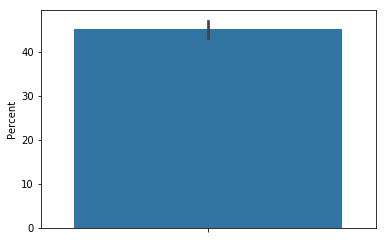

In [16]:
sns.barplot(y='Percent', data=unbiased_df)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

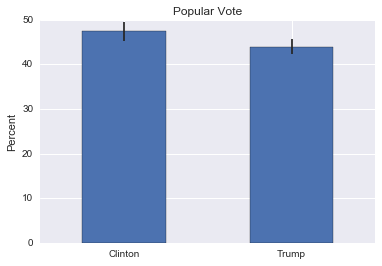

In [93]:
# now plot using pandas built-in plot, with kind='bar' and yerr='std'

unbiased_df['Percent'].plot(yerr = unbiased_df['Stdev'],
                            kind = 'bar',
                            legend = False)

plt.ylabel('Percent')
plt.title('Popular Vote')
plt.xticks(rotation=0)

# My analysis

In [17]:
data.head()

,Trump,Clinton,Other,Undecided,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,43.0,46.0,5.0,6.0,26771,Bloomberg/Selzer,2016-11-04,2016-11-06,Likely Voters,799,Live Phone,Nonpartisan,None
1,39.0,44.0,9.0,8.0,26810,Ipsos/Reuters,2016-11-02,2016-11-06,Likely Voters,2195,Internet,Nonpartisan,None
2,43.0,47.0,5.0,5.0,26778,CBS/Times,2016-11-02,2016-11-06,Likely Voters,1426,Live Phone,Nonpartisan,None
3,46.0,49.0,5.0,NaN,26785,UPI/CVOTER,2016-10-31,2016-11-06,Likely Voters,1625,Internet,Nonpartisan,None
4,44.0,51.0,NaN,5.0,26770,NBC/SurveyMonkey,2016-10-31,2016-11-06,Likely Voters,70194,Internet,Nonpartisan,None


In [18]:
data_new = data[(data.partisanship == 'Nonpartisan') & (data.sample_subpopulation == 'Likely Voters')]

data_new.head(10)

,Trump,Clinton,Other,Undecided,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,43.0,46.0,5.0,6.0,26771,Bloomberg/Selzer,2016-11-04,2016-11-06,Likely Voters,799,Live Phone,Nonpartisan,None
1,39.0,44.0,9.0,8.0,26810,Ipsos/Reuters,2016-11-02,2016-11-06,Likely Voters,2195,Internet,Nonpartisan,None
2,43.0,47.0,5.0,5.0,26778,CBS/Times,2016-11-02,2016-11-06,Likely Voters,1426,Live Phone,Nonpartisan,None
3,46.0,49.0,5.0,NaN,26785,UPI/CVOTER,2016-10-31,2016-11-06,Likely Voters,1625,Internet,Nonpartisan,None
4,44.0,51.0,NaN,5.0,26770,NBC/SurveyMonkey,2016-10-31,2016-11-06,Likely Voters,70194,Internet,Nonpartisan,None
5,44.0,46.0,8.0,2.0,26734,McClatchy/Marist,2016-11-01,2016-11-03,Likely Voters,940,Live Phone,Nonpartisan,None
6,44.0,47.0,5.0,5.0,26647,CBS/Times,2016-10-28,2016-11-01,Likely Voters,1333,Live Phone,Nonpartisan,None
8,43.0,46.0,NaN,11.0,26556,Politico/Morning Consult,2016-10-29,2016-10-30,Likely Voters,1772,Internet,Nonpartisan,None
9,47.0,52.0,NaN,1.0,26662,Politico/Morning Consult,2016-10-27,2016-10-30,Likely Voters,1249,Live Phone,Nonpartisan,None
10,48.0,49.0,3.0,NaN,26598,UPI/CVOTER,2016-10-24,2016-10-30,Likely Voters,1299,Internet,Nonpartisan,None


In [19]:
data_new = data.head(6).copy()

In [20]:
data_new['trump_voters'] = ((.01 * data_new.Trump) * data_new.sample_size)
data_new['clinton_voters'] = ((.01 * data_new.Clinton) * data_new.sample_size)
data_new['other_voters'] = ((.01 * data_new.Other) * data_new.sample_size)

In [21]:
trump = sum(data_new['trump_voters'])/sum(data_new.sample_size)

In [22]:
clinton = sum(data_new['clinton_voters'])/sum(data_new.sample_size)

In [23]:
other = sum(data_new['other_voters'])/sum(data_new.sample_size)

In [24]:
clinton/(clinton + trump + other)

0.5320809600786088

In [25]:
trump/(clinton + trump + other)

0.4615766527081891

# Monte Carlo simulation

In [26]:
unbiased_df

,Percent,Stdev
Clinton,47.142857,2.267787
Trump,43.285714,2.138090


In [40]:
distro = []
for i in range(100000):
    c = np.random.normal(
        loc=unbiased_df['Percent']['Clinton'], scale=unbiased_df['Stdev']['Clinton'])
    t = np.random.normal(
        loc=unbiased_df['Percent']['Trump'], scale=unbiased_df['Stdev']['Trump'])
    distro.append([c,t])

In [41]:
results = pd.DataFrame(distro, columns=['Clinton', 'Trump'])

In [42]:
clinton_wins = np.where(results['Clinton'] > results['Trump'], 1, 0)

clinton_wins.mean()

0.8906